In [1]:
import imageio

import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

from IPython.display import Image
from matplotlib.colors import ListedColormap

# About the data

The data comes from the World Bank, but I have preprocessed the data to make it esier to handle.

We're looking at the following 14 yes and no statements:

- A woman can apply for a passport in the same way as a man
- A woman can be head of household in the same way as a man
- A woman can choose where to live in the same way as a man
- A woman can get a job in the same way as a man
- A woman can obtain a judgment of divorce in the same way as a man
- A woman can open a bank account in the same way as a man
- A woman can register a business in the same way as a man
- A woman can sign a contract in the same way as a man
- A woman can travel outside her home in the same way as a man
- A woman can travel outside the country in the same way as a man
- A woman can work at night in the same way as a man
- A woman can work in a job deemed dangerous in the same way as a man
- A woman can work in an industrial job in the same way as a man
- A woman has the same rights to remarry as a man

In [2]:
df = pd.read_csv("./data.csv")

In [3]:
df.head()

,series_name,series_code,country_name,country_code,1970,1971,1972,1973,1974,1975,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Apply for a passport,SG.APL.PSPT.EQ,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Be head of household,SG.HLD.HEAD.EQ,Afghanistan,AFG,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Choose where to live,SG.LOC.LIVE.EQ,Afghanistan,AFG,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,Get a job,SG.GET.JOBS.EQ,Afghanistan,AFG,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,Obtain a judgment of divorce,SG.OBT.DVRC.EQ,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualizing the data

## Progress since 1970 to 2022
I want to start with the simplest visualization which is to plot the average over both countries and statements for each year between 1970 and 2022. We will create more exciting graphs and visuals soon.

In [4]:
relevant_years = list(df.columns[4:])

Here are some simple `seaborn` styling that we will reuse for all graphs

In [5]:
sns.set(rc={'figure.figsize':(12, 6)}, font_scale=1.1)
sns.set_style({
    'grid.color': '.92',
    'font.size': '20',
    'axes.facecolor':'white',
    'figure.facecolor': 'white'
})

And now we create the chart

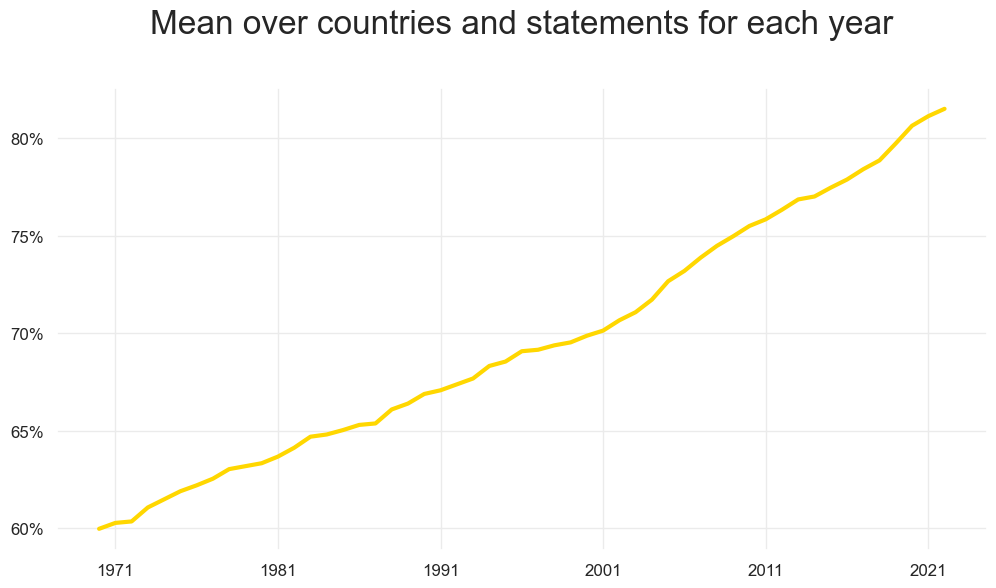

In [6]:
chart = sns.lineplot(
    y=df[relevant_years].mean(axis=0) * 100,
    x=relevant_years,
    color="#FFD700",
    linewidth=3,
)

locator = mdates.DayLocator(interval=10)
chart.xaxis.set_major_locator(locator)
chart.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.title("Mean over countries and statements for each year", fontsize=24, y=1.1)
plt.show()

Let's move on to something more interesting

## Ratio of countries getting a yes for each statement 
In this part, I want to visualize the percentage of countries that get yes to each statement for 1970, 1996, and 2022. 1970 is the first year in the dataset and 2022 the last, 1996 is right in between.

First, we group the dataframe by the `series_name` and calculate the mnean for the relevant years

In [7]:
relevant_years = ["1970", "1996", "2022"]
quetion_df = df[["series_name"] + relevant_years].groupby("series_name").mean().reset_index()

quetion_df.head()

,series_name,1970,1996,2022
0,Apply for a passport,0.433862,0.730159,0.820106
1,Be head of household,0.619048,0.730159,0.851852
2,Choose where to live,0.941799,0.941799,0.947090
3,Get a job,0.645503,0.825397,0.899471
4,Obtain a judgment of divorce,0.587302,0.703704,0.756614


Then we create a `color_palette` that we like

In [8]:
colors = sns.color_palette(["#390099", "#FA26A0", "#FFD700"])

colors

[(0.2235294117647059, 0.0, 0.6),
 (0.9803921568627451, 0.14901960784313725, 0.6274509803921569),
 (1.0, 0.8431372549019608, 0.0)]

Now we can use `seaborn` and `matplotlib` to create a beautiful graph

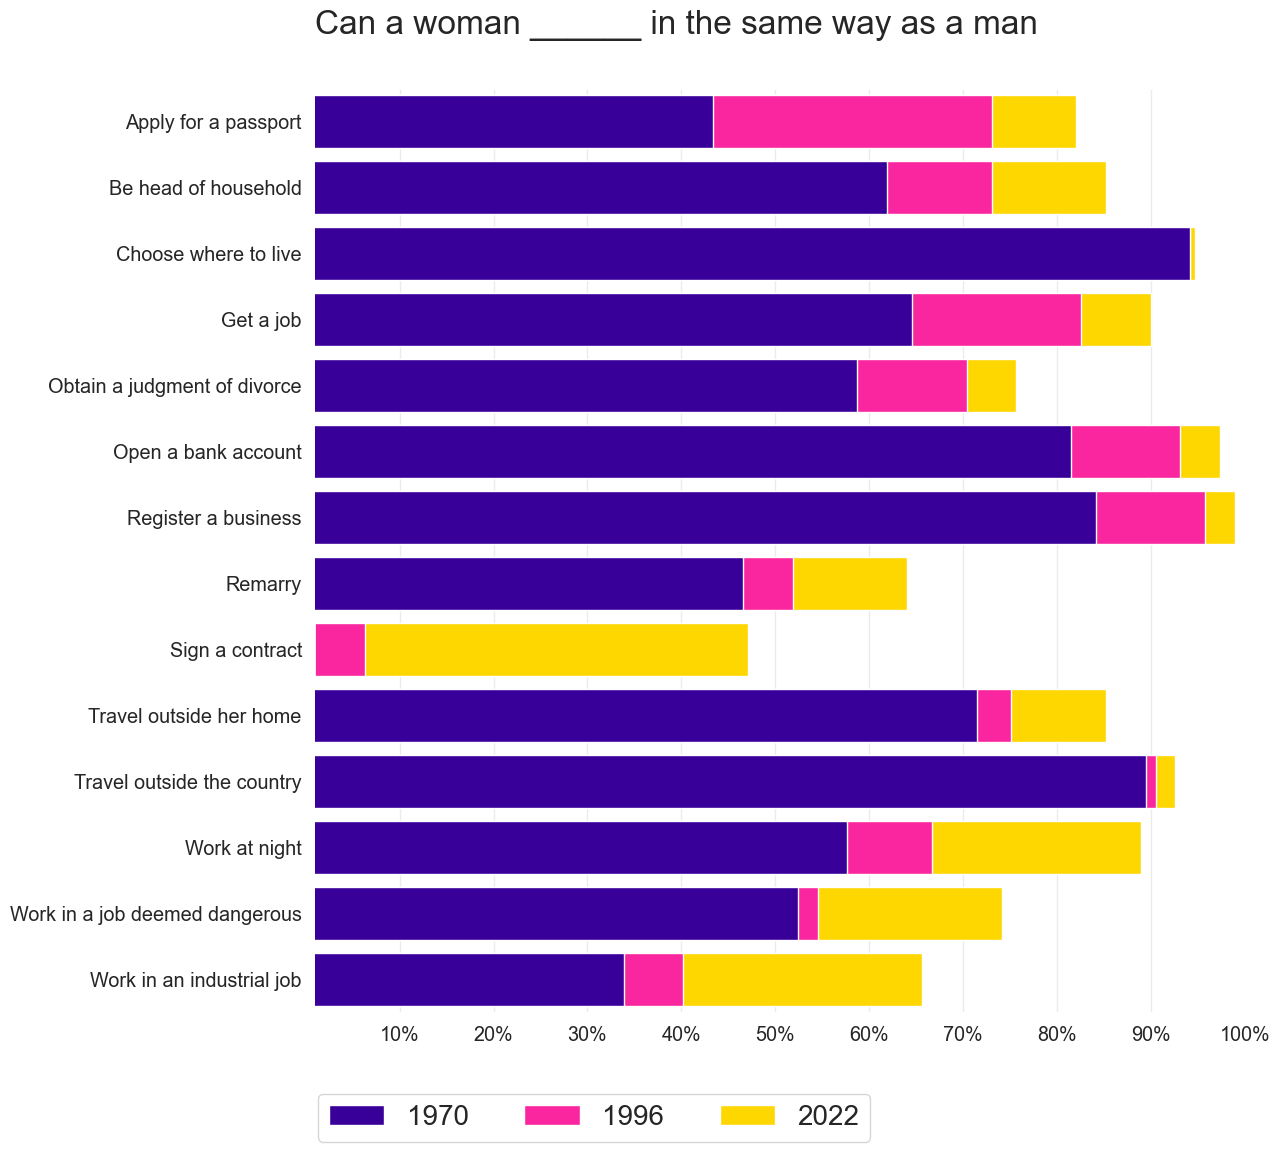

In [9]:
sns.set(rc={'figure.figsize':(12, 12)}, font_scale=1.3)

sns.set_style({
    'grid.color': '.92',
    'font.size': '20',
    'axes.facecolor':'white',
    'figure.facecolor': 'white'
})

for i, year in enumerate(relevant_years):    
    chart = sns.barplot(
        x=quetion_df[year] * 100,
        y=quetion_df.series_name,
        color=colors[i],
        label=year,
        orient="h",
        zorder=len(relevant_years) - i,
        saturation=1
    )

    locator = mdates.DayLocator(interval=10)
    chart.xaxis.set_major_locator(locator)
    chart.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    chart.set(xlabel=None)
    chart.set(ylabel=None)
    
plt.xlim(1, 100)
plt.legend(bbox_to_anchor=(0.3, -0.14), loc='lower center', borderaxespad=0, ncol=3, fontsize="20")
plt.title("Can a woman ______ in the same way as a man", fontsize=24, y=1.05, loc="left")
plt.show()

## Visualizing progress over time using a world map

First we need to load geometry data for different countries if we want to plot it as a map. I'm using `geopandas`.

In [10]:
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/9d/gncfn4ps065dp0h3p0fcpw6r0000gn/T/ipykernel_83071/281705955.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Then we group the original dataframe just like above, but this time we include all years and use `sum()` instead of `mean()`

In [11]:
relevant_years = list(df.columns[4:])

grouped_df = df[["country_code"] + relevant_years].groupby("country_code")
grouped_df = grouped_df.sum().reset_index()

grouped_df.head()

,country_code,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFG,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0
1,AGO,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
2,ALB,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
3,ARE,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3.0,8.0,12.0,12.0,12.0
4,ARG,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0


And add that data to `world_df` using `merge()`

In [12]:
world_df = world_df.merge(grouped_df, left_on="iso_a3", right_on="country_code")

An important part of creating beautiful charts is to have good colors, and that's not always easy. You want to have colors that say something on by them selves, such as red for something bad.

Here I've created a list of 15 colors using https://colordesigner.io/gradient-generator to get colors inbetween `#0a122a` and `#ffd700`. I've created 15 colors because there are 15 potential values for each country and year (0 to 14 yeses)

In [13]:
color_list = ListedColormap([
    "#0a122a",
    "#1d1b3b",
    "#35234a",
    "#4f2956",
    "#6b2e5f",
    "#873364",
    "#a33965",
    "#bd4262",
    "#d54e5d",
    "#e85f54",
    "#f87349",
    "#ff893b",
    "#ffa22b",
    "#ffbc17",
    "#ffd700",
])

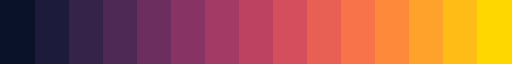

In [14]:
color_list

Here's the function I'm using to create a colored world map with my data. Notice the `projection` parameter which allows you to project the shapes in different ways to create the world map that you prefer. To me `ESRI:54016` looks good, but there are hundreds of other alternatives.

In [15]:
def create_world_map(df, year, colors, projection="ESRI:54016", return_array=False):
    fig, ax = plt.subplots(1, 1, figsize=(25, 10))

    df.to_crs("ESRI:54016").plot(
        column=year,
        legend=True,
        vmin=-0.5,
        vmax=14.5,
        ax=ax,
        legend_kwds={"orientation": "horizontal", "aspect": 34, "shrink": 0.45},
        cmap=colors,
        aspect=0.98
    )

    ax.tick_params(
        axis='both',
        which='both',
        labelbottom=False,
        labelleft=False,
    ) 

    plt.title("Gender rights in {}".format(year), fontsize="32", y=1.1)
    
    if return_array:
        fig.canvas.draw()
        data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close()
        
        # Cropping to remove white space, looking for a better solution
        return np.concatenate([
            data[:700, 820:-750, :],
            data[750:-140, 820:-750, :]
        ])
    else:
        plt.show()

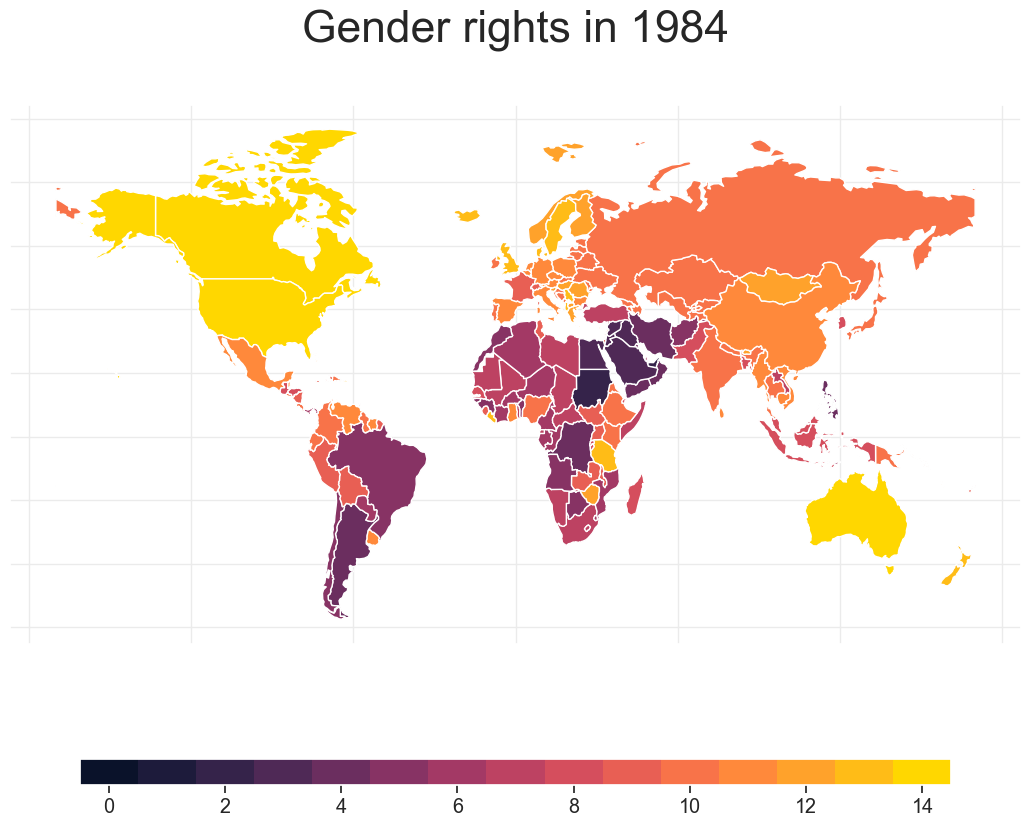

In [16]:
create_world_map(world_df, "1984", color_list)

Now I want to create a `.gif` and have a video where the color of the map changes as we go from 1970 to 2022. The first step is to run our function for all years in the dataframe.

In [17]:
frames = [create_world_map(world_df, year, color_list, return_array=True) for year in relevant_years]

I'm adding a few extra frames at the end to stop for a while before starting over

In [18]:
frames = frames + [frames[-1] for _ in range(20)]

Lastly, we save the `.gif` using `imageio`

In [19]:
imageio.mimsave('./development.gif', frames, fps=3)

Let's take a look

In [20]:
Image(url='development.gif')  